In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from openbb import obb
from sklearn.decomposition import PCA

In [2]:
obb.user.preferences.output_type = "dataframe"

In [3]:
symbols = ["NEM", "RGLD", "SSRM", "CDE", "LLY", "UNH", "JNJ", "MRK"]


In [35]:
obb.equity.price.historical(
    symbol=symbols,
    start_date="2020-01-01",
    end_date="2022-12-31",
    provider="cboe",
)

,open,high,low,close,volume,symbol
date,,,,,,
2020-01-02,8.13,8.19,7.74,7.81,6136715,CDE
2020-01-02,145.87,146.02,145.08,145.97,5634469,JNJ
2020-01-02,131.94,132.26,130.73,132.21,1927432,LLY
2020-01-02,91.15,92.14,90.36,92.04,7877027,MRK
2020-01-02,43.55,43.88,43.19,43.22,5870534,NEM
...,...,...,...,...,...,...
2022-12-30,111.25,111.42,110.12,110.95,5498063,MRK
2022-12-30,47.60,47.60,46.65,47.20,3921216,NEM
2022-12-30,112.65,112.95,111.50,112.72,302856,RGLD


In [7]:
data = obb.equity.price.historical(
    symbol=symbols,
    start_date="2020-01-01",
    end_date="2022-12-31",
).pivot(columns="symbol", values="close")

In [8]:
returns = data.pct_change().dropna()


In [16]:
returns

symbol,CDE,JNJ,LLY,MRK,NEM,RGLD,SSRM,UNH
date,,,,,,,,
2020-01-03,-0.014085,-0.011578,-0.003328,-0.008583,-0.009024,-0.008174,-0.023722,-0.010120
2020-01-06,-0.100000,-0.001248,0.003719,0.004274,0.010040,-0.010988,-0.008099,0.006942
2020-01-07,-0.005772,0.006107,0.001890,-0.026626,-0.000693,0.011531,0.015787,-0.006037
2020-01-08,-0.087083,-0.000138,0.009056,-0.006726,-0.026602,-0.071393,-0.023580,0.021084
2020-01-09,0.017488,0.002966,0.016528,0.008804,-0.009981,0.005287,-0.027442,-0.005678
...,...,...,...,...,...,...,...,...
2022-12-23,-0.011527,0.002542,0.007090,0.005574,0.007368,0.009393,0.008855,0.008006
2022-12-27,0.075802,-0.000282,-0.008209,0.002324,0.018809,0.013914,0.024451,0.001280
2022-12-28,-0.059621,-0.004340,0.000932,-0.009276,-0.028308,-0.025435,-0.039168,-0.006654


In [9]:
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [12]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

In [19]:
pct

array([0.63901831, 0.13367809, 0.10155896])

In [13]:
display(pca_components)

array([[ 0.78393006,  0.06143089,  0.06160311,  0.06816511,  0.29177613,
         0.30859274,  0.42711885,  0.10220165],
       [ 0.03068298,  0.34085106,  0.60697241,  0.38892377, -0.09258777,
        -0.12489908, -0.22950765,  0.53512228],
       [ 0.61810934, -0.10895378, -0.13234297, -0.07217021, -0.39547266,
        -0.41749713, -0.48366699, -0.1367863 ]])

In [14]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)

In [18]:
cum_pct

array([0.63901831, 0.7726964 , 0.87425536])

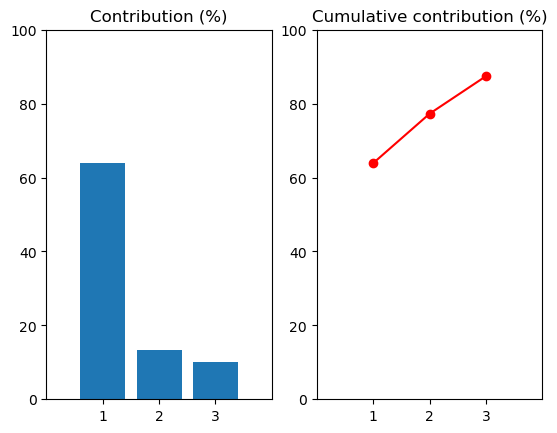

In [15]:
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title("Contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, "ro-")
plt.title("Cumulative contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.show()

In [27]:
np.asarray(returns)

array([[-0.01408451, -0.01157772, -0.00332804, ..., -0.00817371,
        -0.02372167, -0.01011966],
       [-0.1       , -0.00124757,  0.0037186 , ..., -0.0109881 ,
        -0.00809935,  0.00694205],
       [-0.00577201,  0.00610687,  0.00189022, ...,  0.01153102,
         0.01578661, -0.0060367 ],
       ...,
       [-0.0596206 , -0.00433974,  0.00093181, ..., -0.02543484,
        -0.03916769, -0.00665426],
       [ 0.00864553,  0.00509453,  0.00492854, ...,  0.00672646,
         0.00127389,  0.00270603],
       [-0.04      , -0.00512503, -0.00321508, ...,  0.00418708,
        -0.00318066,  0.00056617]])

In [25]:
pca_components

array([[ 0.78393006,  0.06143089,  0.06160311,  0.06816511,  0.29177613,
         0.30859274,  0.42711885,  0.10220165],
       [ 0.03068298,  0.34085106,  0.60697241,  0.38892377, -0.09258777,
        -0.12489908, -0.22950765,  0.53512228],
       [ 0.61810934, -0.10895378, -0.13234297, -0.07217021, -0.39547266,
        -0.41749713, -0.48366699, -0.1367863 ]])

In [28]:
np.cumsum(pct)

array([0.63901831, 0.7726964 , 0.87425536])

In [29]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], index=returns.index, data=factor_returns
)

In [30]:
display(factor_returns)


,f1,f2,f3
date,,,
2020-01-03,-0.028864,-0.007851,0.013454
2020-01-06,-0.081161,0.006442,-0.058891
2020-01-07,0.003634,-0.015533,-0.013911
2020-01-08,-0.105886,0.028236,-0.005677
2020-01-09,0.001928,0.018528,0.023453
...,...,...,...
2022-12-23,0.001585,0.007380,-0.020956
2022-12-27,0.079415,-0.010255,0.022554
2022-12-28,-0.081098,0.004876,0.005835


In [31]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], columns=returns.columns, data=pca_components
).T

In [32]:
display(factor_exposures)

,f1,f2,f3
symbol,,,
CDE,0.783930,0.030683,0.618109
JNJ,0.061431,0.340851,-0.108954
LLY,0.061603,0.606972,-0.132343
MRK,0.068165,0.388924,-0.072170
NEM,0.291776,-0.092588,-0.395473
RGLD,0.308593,-0.124899,-0.417497
SSRM,0.427119,-0.229508,-0.483667
UNH,0.102202,0.535122,-0.136786


<Axes: xlabel='symbol'>

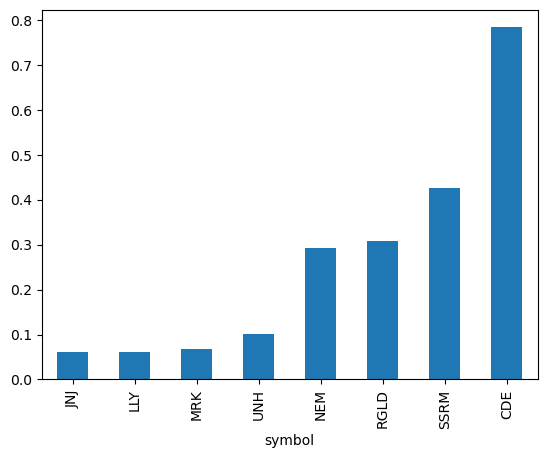

In [33]:
factor_exposures.f1.sort_values().plot.bar()


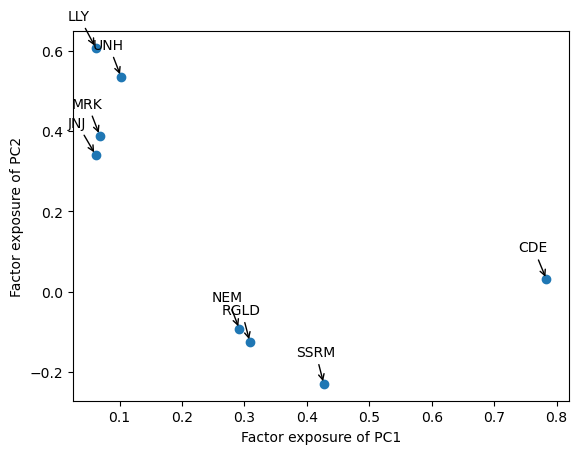

In [34]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Factor exposure of PC1")
plt.ylabel("Factor exposure of PC2")

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

plt.show()